In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://github.com/MyungKyuYi/AI-class/raw/refs/heads/main/AAME.csv')
df = df.sort_values('Date')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.0,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.0,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.0,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.0,3.95,3.75,3.75,3.129709,12700


In [3]:
df = df.drop(['Date', 'Volume', 'Adj Close'], axis=1)

In [4]:
df.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

In [5]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [6]:
def split_sequence(data, window_size):
    X, y = [], [] # X: 60일간의 Open, High, Low, Close값, y: 다음 날의 Close 값

    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size, 3])

    return np.array(X), np.array(y)

In [7]:
X, y = split_sequence(scaled_data, 10)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [9]:
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
227/227 [==============================] - 6s 12ms/step - loss: 0.0015 - val_loss: 3.8578e-05
Epoch 2/20
227/227 [==============================] - 2s 8ms/step - loss: 1.7786e-04 - val_loss: 2.7774e-05
Epoch 3/20
227/227 [==============================] - 2s 10ms/step - loss: 1.6892e-04 - val_loss: 2.7548e-05
Epoch 4/20
227/227 [==============================] - 2s 10ms/step - loss: 1.6417e-04 - val_loss: 2.5169e-05
Epoch 5/20
227/227 [==============================] - 2s 10ms/step - loss: 1.5666e-04 - val_loss: 2.3752e-05
Epoch 6/20
227/227 [==============================] - 2s 10ms/step - loss: 1.4220e-04 - val_loss: 2.4028e-05
Epoch 7/20
227/227 [==============================] - 2s 10ms/step - loss: 1.3379e-04 - val_loss: 2.4499e-05
Epoch 8/20
227/227 [==============================] - 2s 10ms/step - loss: 1.2810e-04 - val_loss: 2.5436e-05
Epoch 9/20
227/227 [==============================] - 2s 10ms/step - loss: 1.2392e-04 - val_loss: 2.6538e-05
Epoch 10/20
227/227 [===

64/64 [==============================] - 1s 4ms/step


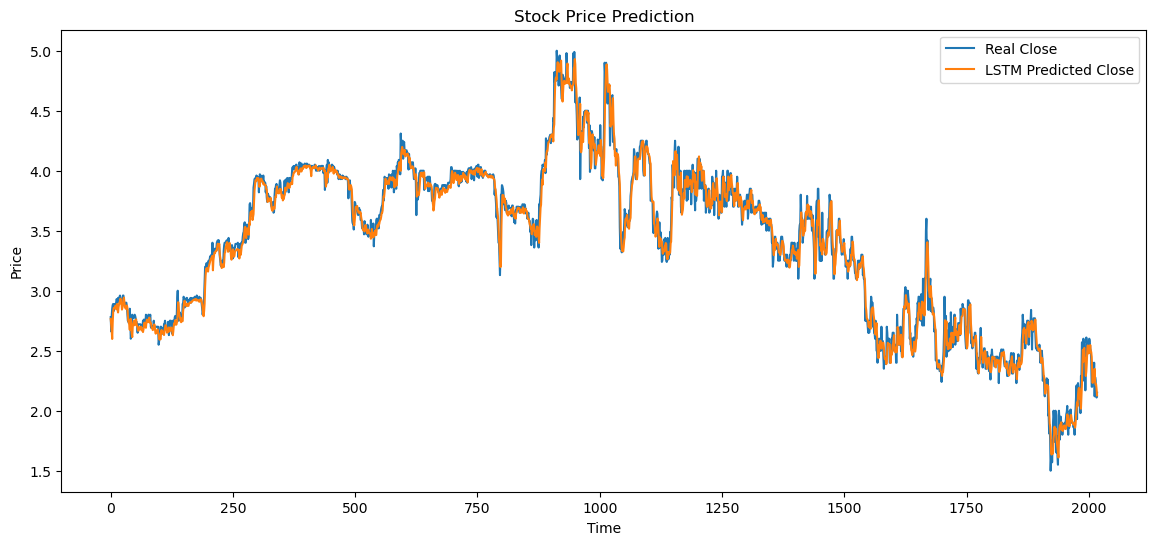

In [10]:
y_pred = model.predict(X_test)

def inverse_transform_close(y_scaled):
    dummy = np.zeros((len(y_scaled), 4))
    dummy[:, 3] = y_scaled
    return scaler.inverse_transform(dummy)[:, 3]

real_close = inverse_transform_close(y_test)
pred_close = inverse_transform_close(y_pred.flatten())

plt.figure(figsize=(14, 6))
plt.plot(real_close, label='Real Close')
plt.plot(pred_close, label='LSTM Predicted Close')
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()